In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API Key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | harer
Processing Record 2 of Set 13 | hilo
Processing Record 3 of Set 13 | codrington
Processing Record 4 of Set 13 | aykhal
Processing Record 5 of Set 13 | talnakh
Processing Record 6 of Set 13 | yumen
Processing Record 7 of Set 13 | ostrovnoy
Processing Record 8 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 13 | avarua
Processing Record 10 of Set 13 | albany
Processing Record 11 of Set 13 | ruatoria
City not found. Skipping...
Processing Record 12 of Set 13 | bolshoy uluy
City not found. Skipping...
Processing Record 13 of Set 13 | bandarbeyla
Processing Record 14 of Set 13 | carnarvon
Processing Record 15 of Set 13 | vila franca do campo
Processing Record 16 of Set 13 | broken hill
Processing Record 17 of Set 13 | xiuyan
Processing Record 18 of Set 13 | cabo san lucas
Processing Record 19 of Set 13 | new norfolk
Processing Record 20 of Set 13 | luchenza
Proc

Processing Record 34 of Set 16 | yar-sale
Processing Record 35 of Set 16 | torres
Processing Record 36 of Set 16 | florida ridge
Processing Record 37 of Set 16 | qatana
Processing Record 38 of Set 16 | micheweni
Processing Record 39 of Set 16 | guicheng
City not found. Skipping...
Processing Record 40 of Set 16 | marevo
Processing Record 41 of Set 16 | brae
Processing Record 42 of Set 16 | puerto madryn
Processing Record 43 of Set 16 | kangaatsiaq
Processing Record 44 of Set 16 | dargaville
Processing Record 45 of Set 16 | la malbaie
Processing Record 46 of Set 16 | hambantota
Processing Record 47 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 48 of Set 16 | honiara
Processing Record 49 of Set 16 | touros
Processing Record 50 of Set 16 | kamaishi
Processing Record 1 of Set 17 | nago
Processing Record 2 of Set 17 | souillac
Processing Record 3 of Set 17 | scottsburgh
City not found. Skipping...
Processing Record 4 of Set 17 | tura
Processing Record 5 of Set 17 | mora

City not found. Skipping...
Processing Record 21 of Set 20 | tehachapi
Processing Record 22 of Set 20 | junction city
Processing Record 23 of Set 20 | zhigalovo
Processing Record 24 of Set 20 | terrace
Processing Record 25 of Set 20 | matagami
Processing Record 26 of Set 20 | lodja
Processing Record 27 of Set 20 | barawe
City not found. Skipping...
Processing Record 28 of Set 20 | multan
Processing Record 29 of Set 20 | imeni poliny osipenko
Processing Record 30 of Set 20 | mount gambier
Processing Record 31 of Set 20 | kuusamo
Processing Record 32 of Set 20 | aksarka
Processing Record 33 of Set 20 | yuli
Processing Record 34 of Set 20 | awash
Processing Record 35 of Set 20 | saint-joseph
Processing Record 36 of Set 20 | lata
Processing Record 37 of Set 20 | batticaloa
Processing Record 38 of Set 20 | bargal
City not found. Skipping...
Processing Record 39 of Set 20 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 20 | stepnogorsk
Processing Record 41 of

Processing Record 5 of Set 24 | thunder bay
Processing Record 6 of Set 24 | tecolutla
Processing Record 7 of Set 24 | biak
Processing Record 8 of Set 24 | utiroa
City not found. Skipping...
Processing Record 9 of Set 24 | cairo
Processing Record 10 of Set 24 | lincoln
Processing Record 11 of Set 24 | dunedin
Processing Record 12 of Set 24 | athens
Processing Record 13 of Set 24 | tchollire
Processing Record 14 of Set 24 | pangnirtung
Processing Record 15 of Set 24 | hastings
Processing Record 16 of Set 24 | ulaangom
Processing Record 17 of Set 24 | preston
Processing Record 18 of Set 24 | shanhetun
Processing Record 19 of Set 24 | novyy urengoy
Processing Record 20 of Set 24 | kawana waters
City not found. Skipping...
Processing Record 21 of Set 24 | artyk
City not found. Skipping...
Processing Record 22 of Set 24 | nianzishan
Processing Record 23 of Set 24 | makakilo city
Processing Record 24 of Set 24 | hernani
Processing Record 25 of Set 24 | uyuni
Processing Record 26 of Set 24 | m

In [8]:
len(city_data)

578

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Harer,9.31,42.13,58.41,55,0,3.15,ET,2020-10-19 19:11:01
1,Hilo,19.73,-155.09,79.00,78,90,8.05,US,2020-10-19 19:11:01
2,Codrington,-38.27,141.97,41.58,91,3,4.14,AU,2020-10-19 19:11:01
3,Aykhal,66.00,111.50,14.00,92,90,4.47,RU,2020-10-19 19:11:01
4,Talnakh,69.49,88.40,14.00,92,90,8.95,RU,2020-10-19 19:11:01
5,Yumen,40.28,97.20,47.16,47,0,19.01,CN,2020-10-19 19:11:01
6,Ostrovnoy,68.05,39.51,35.37,83,100,13.40,RU,2020-10-19 19:06:51
7,Avarua,-21.21,-159.78,78.80,83,0,6.93,CK,2020-10-19 19:11:02
8,Albany,42.60,-73.97,60.01,73,100,5.97,US,2020-10-19 19:10:04
9,Bandarbeyla,9.49,50.81,78.73,77,0,1.16,SO,2020-10-19 19:11:02


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harer,ET,2020-10-19 19:11:01,9.31,42.13,58.41,55,0,3.15
1,Hilo,US,2020-10-19 19:11:01,19.73,-155.09,79.00,78,90,8.05
2,Codrington,AU,2020-10-19 19:11:01,-38.27,141.97,41.58,91,3,4.14
3,Aykhal,RU,2020-10-19 19:11:01,66.00,111.50,14.00,92,90,4.47
4,Talnakh,RU,2020-10-19 19:11:01,69.49,88.40,14.00,92,90,8.95
5,Yumen,CN,2020-10-19 19:11:01,40.28,97.20,47.16,47,0,19.01
6,Ostrovnoy,RU,2020-10-19 19:06:51,68.05,39.51,35.37,83,100,13.40
7,Avarua,CK,2020-10-19 19:11:02,-21.21,-159.78,78.80,83,0,6.93
8,Albany,US,2020-10-19 19:10:04,42.60,-73.97,60.01,73,100,5.97
9,Bandarbeyla,SO,2020-10-19 19:11:02,9.49,50.81,78.73,77,0,1.16


In [11]:
# Create the ouput file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/19/20'

<function matplotlib.pyplot.show(close=None, block=None)>

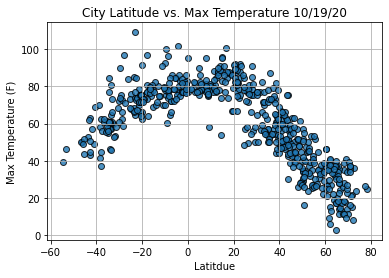

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
          max_temps,
          edgecolor="black", linewidths=1, marker="o",
          alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitdue")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show

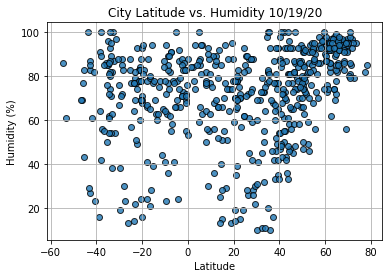

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

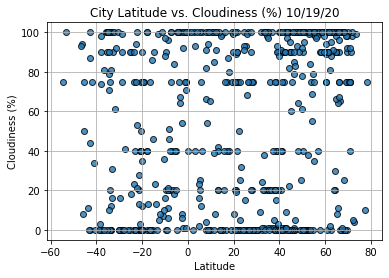

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

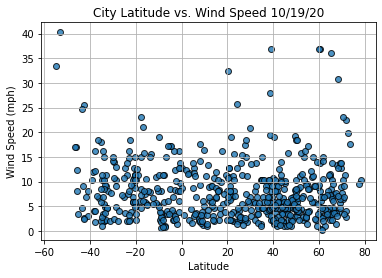

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [64]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [65]:
index13 = city_data_df.loc[13]
index13

City                       Xiuyan
Country                        CN
Date          2020-10-19 19:11:03
Lat                         40.29
Lng                        123.27
Max Temp                    48.16
Humidity                       88
Cloudiness                      0
Wind Speed                   1.41
Name: 13, dtype: object

In [66]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [67]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harer,ET,2020-10-19 19:11:01,9.31,42.13,58.41,55,0,3.15
1,Hilo,US,2020-10-19 19:11:01,19.73,-155.09,79.00,78,90,8.05
3,Aykhal,RU,2020-10-19 19:11:01,66.00,111.50,14.00,92,90,4.47
4,Talnakh,RU,2020-10-19 19:11:01,69.49,88.40,14.00,92,90,8.95
5,Yumen,CN,2020-10-19 19:11:01,40.28,97.20,47.16,47,0,19.01


In [68]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Codrington,AU,2020-10-19 19:11:01,-38.27,141.97,41.58,91,3,4.14
7,Avarua,CK,2020-10-19 19:11:02,-21.21,-159.78,78.80,83,0,6.93
10,Carnarvon,AU,2020-10-19 19:11:03,-24.87,113.63,68.00,77,90,12.75
12,Broken Hill,AU,2020-10-19 19:07:23,-31.95,141.43,53.60,54,61,8.05
15,New Norfolk,AU,2020-10-19 19:11:04,-42.78,147.06,43.00,83,87,2.57


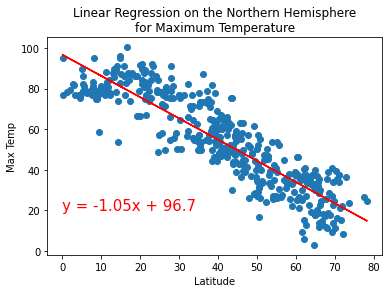

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature',
                       'Max Temp',(0,20))

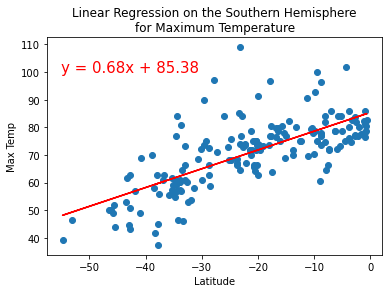

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-55,100))

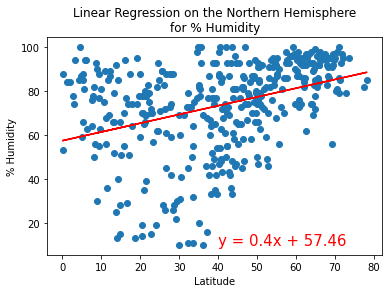

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

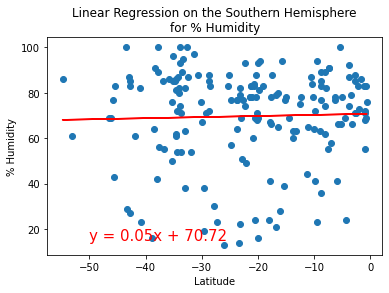

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

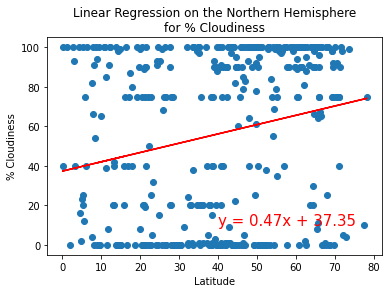

In [78]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(40,10))

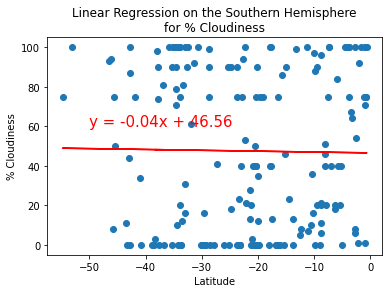

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

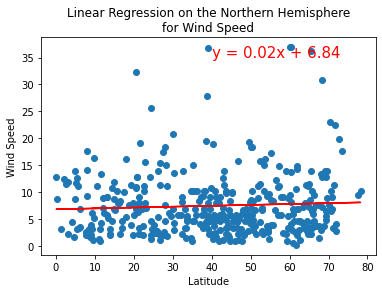

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

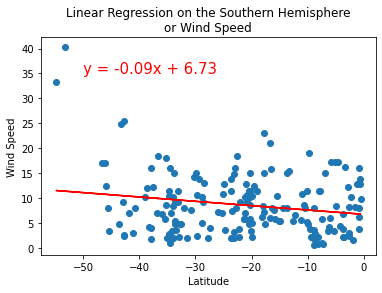

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nor Wind Speed', 'Wind Speed',(-50,35))